# Vad är skillnaden mellan Regressionsproblem och Klassificieringsproblem?

I klassificering så försöker man göra en modell som kan seperera datan till olika klasser som tex är det dag eller natt.
Regression är när man försöker skapa en modell med hjälp av matematiska metoder. Man försöker uppskatta den numeriska datans uppskatning med den minsta felavvikselsen.

# Vad är ”supervised learning”? Kan du ge några exempel på modeller som används och potentiella tillämpningsområden? Vad är RMSE? Vad är en ”Confusion Matrix”?

Man tränar datorn med hjälp av algoritmer(regler) så att den kan ta in datan och predictera värderna från tex ett dataset. I supervised learning finns det alltid ett y till skillnad mot unsupervised learning där y inte finns. 

Linjär regression kan man använda när man vill se sambandet mellan olika varibler. Målet är att hitta den bäst anpassade linjen som kan förutsäga värdena för den beroende variabeln baserat på värdena för de oberoende variablerna.

Logistiks regression använder man när försöker förutsäga sannolikheten för att datan till hör en specifik klass.

Random forest skapar en stor skog helt enkelt. Den bygger ett stort antal besultsträd och sedan aggergera deras förutsättningar. Varje beslutsträd tränar på en slumpmässig delmängd av träningsdatan och en slumpmässig delmängd av funktionerna. Genom detta får varje träd ett annat perspektiv på datan vilket leder till ett stabilt resultat. Random forest innehåller även bagging.

RMSE står för Root mean squared error. Den mäter den faktiska skillnaden mellan förutsagda värden och faktiska värden. Den visar den genomsnittliga avvikelsen ifrån de sanna värdena. Ju lägre resultat man har på RMSE inom ML detstå högre prestanda har man på modellen.

En confusion matrix är en matris där man kan se vad man faktiskt predicterar rätt och på matrisen kan du även se false positive vilket innebär att man har predicterat något som är sant fast det inte var det och med false negative så har man predicterat något fel fast egentligen skulle det ha varit positivt.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import reciprocal, uniform, loguniform, randint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Creating function

In [13]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    disp.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=45)
    plt.show()

# Importing dataset and exploring it

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [7]:
print(X.shape)

(70000, 784)


In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# First i used the whole dataset but im scaling it down to reduce the time to train models.
X_train = X[:5000]
y_train = y[:5000]
X_test = X[5000:6000]
y_test = y[5000:6000]


In [6]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(5000, 784)
(5000,)
(1000, 784)
(1000,)


# Plotting to see what im dealing with

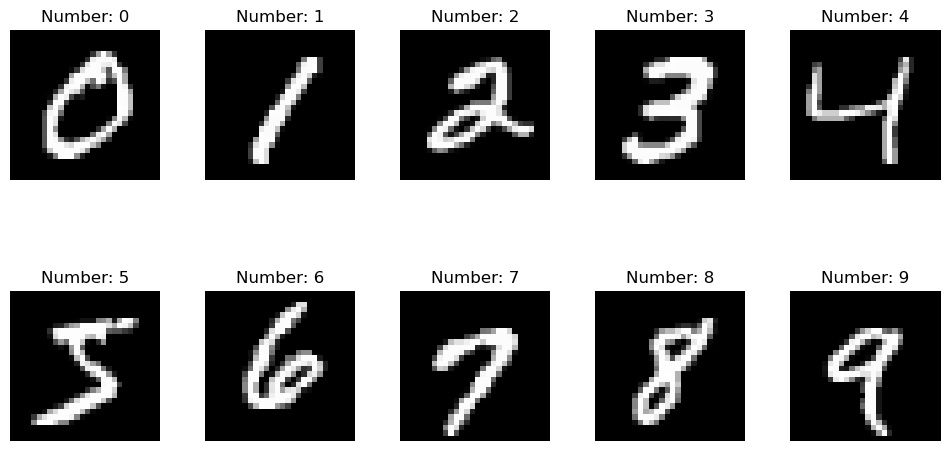

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i in range(10):
    row = i // 5
    col = i % 5
    idx = np.argmax(y == i)
    axs[row, col].imshow(X[idx].reshape(28, 28), cmap='gray')
    axs[row, col].axis('off')
    axs[row, col].set_title("Number: {}".format(i), fontsize=12)
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

# Creating SVC

In [16]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': [0.001, 0.01, 0.1],
    'clf__kernel': ['linear', 'rbf']
}


In [17]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10],
                         'clf__gamma': [0.001, 0.01, 0.1],
                         'clf__kernel': ['linear', 'rbf']},
             verbose=2)

In [19]:
print("Best grids", grid_search.best_params_)

Best grids {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


In [20]:
best_pipe = grid_search.best_estimator_
y_pred = best_pipe.predict(X_test)

accuracy = best_pipe.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


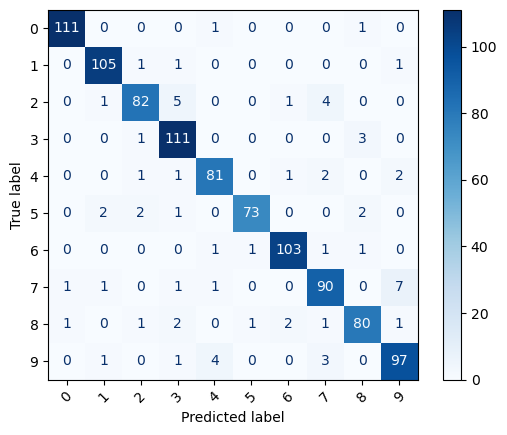

In [21]:
display_confusion_matrix(y_test, y_pred)

In [22]:
target_names = ['No.0', 'No.1', 'No.2', 'No.3', 'No.4', 'No.5', 'No.6', 'No.7', 'No.8', 'No.9']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        No.0       0.98      0.98      0.98       113
        No.1       0.95      0.97      0.96       108
        No.2       0.93      0.88      0.91        93
        No.3       0.90      0.97      0.93       115
        No.4       0.92      0.92      0.92        88
        No.5       0.97      0.91      0.94        80
        No.6       0.96      0.96      0.96       107
        No.7       0.89      0.89      0.89       101
        No.8       0.92      0.90      0.91        89
        No.9       0.90      0.92      0.91       106

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



# Creating pipeline and randomforestclassifier

In [13]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier())
])

param_grid = {
    'rfc__n_estimators': [50, 150, 200],
    'rfc__max_depth': [None, 10, 20],
    'rfc__min_samples_split': [2, 4, 6],
}

grid = GridSearchCV(pipe, param_grid, random_state=42, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [None, 10, 20],
                         'rfc__min_samples_split': [2, 4, 6],
                         'rfc__n_estimators': [50, 150, 200]})

In [14]:
print("Best grids", grid.best_params_)

Best grids {'rfc__max_depth': None, 'rfc__min_samples_split': 4, 'rfc__n_estimators': 150}


In [15]:
best_pipe = grid.best_estimator_
y_pred = best_pipe.predict(X_test)

accuracy = best_pipe.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


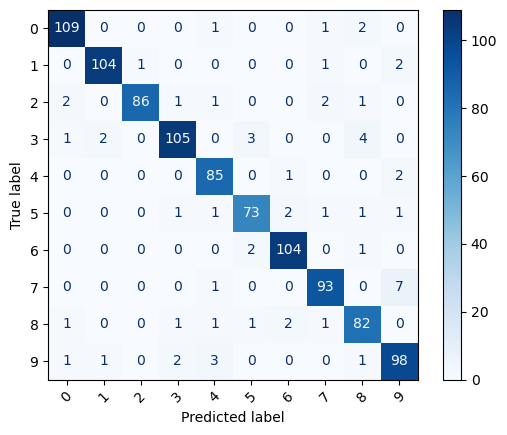

In [16]:
display_confusion_matrix(y_test, y_pred)

In [17]:
target_names = ['No.0', 'No.1', 'No.2', 'No.3', 'No.4', 'No.5', 'No.6', 'No.7', 'No.8', 'No.9']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        No.0       0.96      0.96      0.96       113
        No.1       0.97      0.96      0.97       108
        No.2       0.99      0.92      0.96        93
        No.3       0.95      0.91      0.93       115
        No.4       0.91      0.97      0.94        88
        No.5       0.92      0.91      0.92        80
        No.6       0.95      0.97      0.96       107
        No.7       0.94      0.92      0.93       101
        No.8       0.89      0.92      0.91        89
        No.9       0.89      0.92      0.91       106

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



# Randomized search

In [ ]:
scaler = StandardScaler()


In [4]:
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam')

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', clf)
])

param_grid = {
    'clf__alpha': loguniform(0.01, 0.1),
    'clf__learning_rate_init': loguniform(10**-5, 10**0),
    'clf__max_iter': randint(100, 1000)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [5]:
random = RandomizedSearchCV(pipe, param_grid, n_iter=10, cv=cv, verbose=2, n_jobs=-1)
random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf', MLPClassifier())]),
                   n_jobs=-1,
                   param_distributions={'clf__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D29C62B580>,
                                        'clf__learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D29C63E4C0>,
                                        'clf__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D296A92070>},
                   verbose=2)

In [10]:
print("Best grids", random.best_params_)

Best grids {'clf__alpha': 0.0681932774509798, 'clf__learning_rate_init': 0.0017904322695682978, 'clf__max_iter': 644}


In [11]:
best_pipe = random.best_estimator_
y_pred = best_pipe.predict(X_test)

accuracy = best_pipe.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


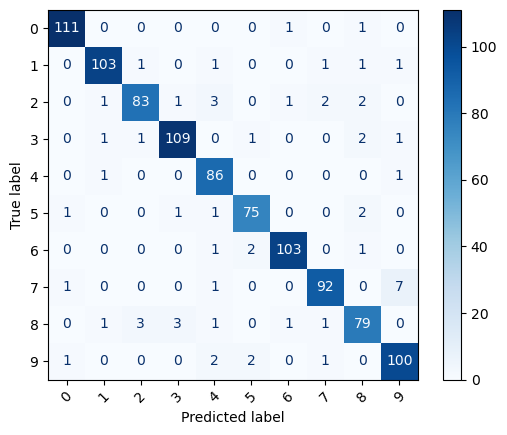

In [14]:
display_confusion_matrix(y_test, y_pred)

In [15]:
target_names = ['No.0', 'No.1', 'No.2', 'No.3', 'No.4', 'No.5', 'No.6', 'No.7', 'No.8', 'No.9']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        No.0       0.97      0.98      0.98       113
        No.1       0.96      0.95      0.96       108
        No.2       0.94      0.89      0.92        93
        No.3       0.96      0.95      0.95       115
        No.4       0.90      0.98      0.93        88
        No.5       0.94      0.94      0.94        80
        No.6       0.97      0.96      0.97       107
        No.7       0.95      0.91      0.93       101
        No.8       0.90      0.89      0.89        89
        No.9       0.91      0.94      0.93       106

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

